In [1]:
import pandas as pd
df = pd.read_csv('Citywide_Payroll_Data__Fiscal_Year_.csv')
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("-", "_")
df.columns = df.columns.str.lower()
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

/Users/areena.arora/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


1. Add column for tenure years
2. Show relationship between overtime and tenure -- scrollytelling. 
   - Use second chart to narrow down to the top three agencies that pay the most in overtime

#### Cleaning the data + adding a column for tenure

The database includes people whose work locations are outside of NYC. For this analyses, we're only including employees with work locations in NYC boroughs. Since Staten Island wasn't listed (unless included in the "other" location, this is filtered down to Queens, Manhattan, Bronx and Brooklyn.

In [2]:
boroughs = ['QUEENS', 'MANHATTAN', 'BROOKLYN', 'BRONX']

In [3]:
df = df[df.work_location_borough.isin(boroughs)]

In [4]:
df['agency_start_date'] = pd.to_datetime(df.agency_start_date, errors='coerce')
df['today'] = pd.to_datetime('today')
df['tenure_years'] = (df.today - df.agency_start_date).astype('timedelta64[Y]')

In [5]:
df.groupby(by='agency_name').total_ot_paid.sum().reset_index().sort_values(by='total_ot_paid', ascending = False).head(5)

,agency_name,total_ot_paid
125,POLICE DEPARTMENT,"3,410,660,240.39"
88,FIRE DEPARTMENT,"1,596,842,055.03"
59,DEPARTMENT OF CORRECTION,"981,672,183.09"
65,DEPARTMENT OF SANITATION,"790,873,824.62"
114,NYC HOUSING AUTHORITY,"553,297,085.88"


In [6]:
three_agencies = ['POLICE DEPARTMENT', 'FIRE DEPARTMENT', 'DEPARTMENT OF CORRECTION']
df_agencies = df[df.agency_name.isin(three_agencies)]

In [7]:
df_agencies.query('last_name == "MURTHA"').query('first_name == "KEVIN"')

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,today,tenure_years
539517,2017,NaN,POLICE DEPARTMENT,MURTHA,KEVIN,C,2006-01-31,BROOKLYN,POLICE OFFICER,ACTIVE,"85,292.00",per Annum,"2,051.43","97,215.76",203.83,"17,248.58","20,892.23",2022-05-28 16:30:06.791017,16.00
539518,2017,NaN,POLICE DEPARTMENT,MURTHA,KEVIN,NaN,1995-04-30,BROOKLYN,LIEUTENANT D/A SPECIAL ASSIGNMENT,ACTIVE,"134,067.00",per Annum,"2,051.43","132,640.94",433.70,"50,799.80","28,006.50",2022-05-28 16:30:06.791017,27.00
1082287,2018,56.00,POLICE DEPARTMENT,MURTHA,KEVIN,NaN,1995-04-30,BROOKLYN,LIEUTENANT D/A SPECIAL ASSIGNMENT,ACTIVE,"138,089.00",per Annum,"2,045.72","134,294.80",536.33,"62,473.98","27,815.30",2022-05-28 16:30:06.791017,27.00
1090253,2018,56.00,POLICE DEPARTMENT,MURTHA,KEVIN,C,2006-01-31,BRONX,POLICE OFFICER,ACTIVE,"85,292.00",per Annum,"2,045.72","85,058.22",212.00,"16,009.92","17,306.11",2022-05-28 16:30:06.791017,16.00
1688151,2019,56.00,POLICE DEPARTMENT,MURTHA,KEVIN,C,2006-01-31,BRONX,POLICE OFFICER,ACTIVE,"85,292.00",per Annum,"2,040.00","85,058.23",258.58,"21,586.78","17,387.26",2022-05-28 16:30:06.791017,16.00
1697037,2019,56.00,POLICE DEPARTMENT,MURTHA,KEVIN,NaN,1995-04-30,BROOKLYN,LIEUTENANT D/A SPECIAL ASSIGNMENT,ACTIVE,"138,089.00",per Annum,"2,040.00","137,710.56",387.87,"57,280.57","25,084.00",2022-05-28 16:30:06.791017,27.00
1705627,2020,56.00,POLICE DEPARTMENT,MURTHA,KEVIN,NaN,1995-04-30,MANHATTAN,LIEUTENANT D/A SPECIAL ASSIGNMENT,CEASED,"141,196.00",per Annum,665.18,"48,008.86","2,451.57","162,000.47","78,132.88",2022-05-28 16:30:06.791017,27.00
1718566,2020,56.00,POLICE DEPARTMENT,MURTHA,KEVIN,C,2006-01-31,BRONX,POLICE OFFICER,ACTIVE,"85,292.00",per Annum,"2,080.00","84,831.14",495.25,"27,694.04","19,880.59",2022-05-28 16:30:06.791017,16.00
2328496,2021,56.00,POLICE DEPARTMENT,MURTHA,KEVIN,C,2006-01-31,BRONX,POLICE OFFICER,ACTIVE,"85,292.00",per Annum,"2,080.00","85,051.84",603.17,"28,245.39","19,844.18",2022-05-28 16:30:06.791017,16.00


In [8]:
from plotnine import *

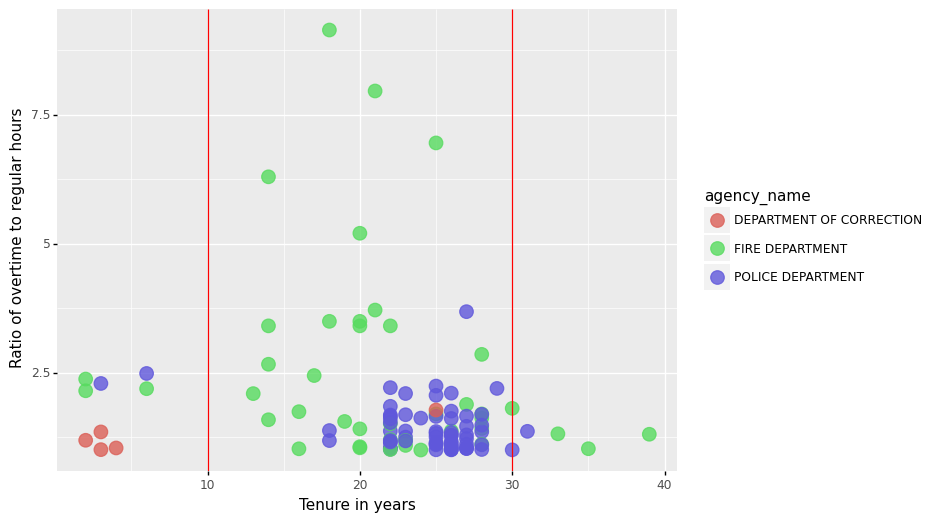

<ggplot: (326583351)>

In [9]:
chart = (
    ggplot(df_agencies.query('ot_hours/regular_hours > 1').query('leave_status_as_of_june_30 == "CEASED"').query('regular_hours > 0'), 
           aes(x='tenure_years', y='ot_hours/regular_hours', color='agency_name')) +
        geom_point(alpha = 0.8, size=5) +
        geom_vline(aes(xintercept=10), color='red') +
        geom_vline(aes(xintercept=30), color='red') +
        labs(
            y = 'Ratio of overtime to regular hours',
            x = 'Tenure in years'
        ) + 
        theme(figure_size=(8,6))

)

chart
# .save('three_agencies.svg')

In [10]:
df_agencies.query('ot_hours/regular_hours > 5').query('leave_status_as_of_june_30 == "CEASED"').query('regular_hours > 0')

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,today,tenure_years
1783746,2020,57.00,FIRE DEPARTMENT,MCNULTY,JAMES,G,2001-02-04,BROOKLYN,FIREFIGHTER,CEASED,"85,292.00",per Annum,22.87,935.01,182.00,"8,904.16","17,803.03",2022-05-28 16:30:06.791017,21.00
1783849,2020,57.00,FIRE DEPARTMENT,MURTHA,DONALD,P,2004-05-25,BROOKLYN,FIREFIGHTER,CEASED,"85,292.00",per Annum,22.87,935.01,209.00,"8,980.20","13,775.24",2022-05-28 16:30:06.791017,18.00
1783955,2020,57.00,FIRE DEPARTMENT,CICCARELLI,RALPH,J,2008-01-21,BROOKLYN,FIREFIGHTER,CEASED,"85,292.00",per Annum,22.87,935.01,144.00,"6,036.56","10,717.64",2022-05-28 16:30:06.791017,14.00
2620473,2021,57.00,FIRE DEPARTMENT,PESCE,CHRISTOPHER,D,1997-04-15,BROOKLYN,FIREFIGHTER,CEASED,"85,292.00",per Annum,22.87,932.20,159.00,"6,751.86","19,422.90",2022-05-28 16:30:06.791017,25.00
2635833,2021,57.00,FIRE DEPARTMENT,WONICA,SCOTT,P,2001-10-28,BROOKLYN,FIREFIGHTER,CEASED,"85,292.00",per Annum,22.87,932.20,119.00,"5,004.38","14,409.67",2022-05-28 16:30:06.791017,20.00


In [ ]:
chart = (
    ggplot(df_agencies.query('ot_hours/regular_hours > 1').query('leave_status_as_of_june_30 == "CEASED"').query('regular_hours > 0').query(, 
           aes(x='tenure_years', y='ot_hours/regular_hours', color='agency_name')) +
        geom_point(alpha = 0.8, size=5) +
        geom_vline(aes(xintercept=10), color='red') +
        geom_vline(aes(xintercept=30), color='red') +
        labs(
            y = 'Ratio of overtime to regular hours',
            x = 'Tenure in years'
        ) + 
        theme(figure_size=(8,6))

)

chart
# .save('three_agencies.svg')

In [11]:
# chart = (
#     ggplot(df.query('regular_hours > 0').query('ot_hours/regular_hours>0').query('ot_hours>0').query('tenure_years < 40').query('leave_status_as_of_june_30 == "CEASED"'), 
#            aes(x='tenure_years', y='ot_hours/regular_hours')) +
#         geom_point(alpha = 0.5) +
#         geom_vline(aes(xintercept=10), color='red') +
#         geom_vline(aes(xintercept=30), color='red') +
#         labs(
#             y = 'Ratio of overtime to regular hours',
#             x = 'Tenure in years'
#         ) + 
#         theme(figure_size=(10,7))

# )

# chart

In [12]:
# chart.save('tenure_ot.svg')

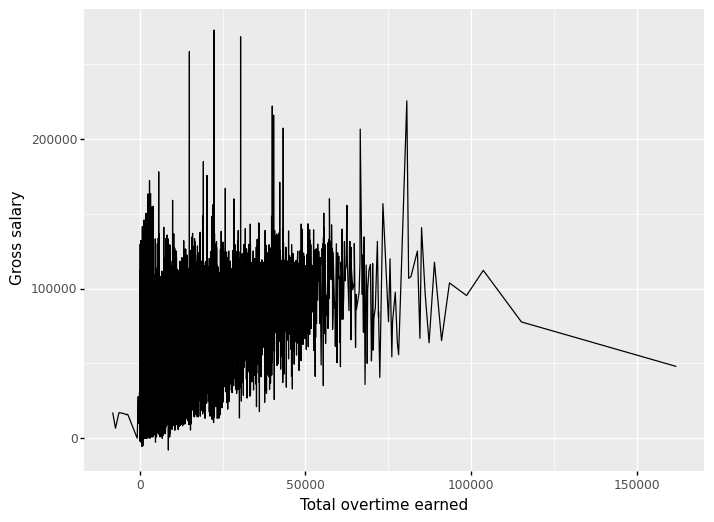

<ggplot: (382021593)>

In [13]:
chart = (
    ggplot(df.query('leave_status_as_of_june_30 == "CEASED"').query('ot_hours > 0'), 
           aes(x='total_ot_paid', y='regular_gross_paid')) +
        geom_line() +
#         geom_vline(aes(xintercept=10), color='red') +
#         geom_vline(aes(xintercept=30), color='red') +
        labs(
            y = 'Gross salary',
            x = 'Total overtime earned'
        ) + 
        theme(figure_size=(8,6))

)

chart

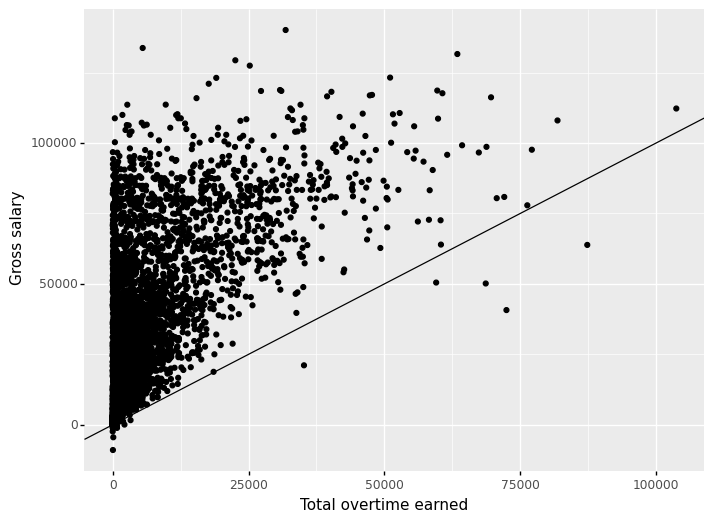

<ggplot: (1034654696)>

In [45]:
chart = (
    ggplot(df_agencies.query('agency_name == "DEPARTMENT OF CORRECTION"').query('total_ot_paid > 0').query('leave_status_as_of_june_30 == "CEASED"'), 
           aes(x='total_ot_paid', y='regular_gross_paid')) +
        geom_point() +
        geom_abline(intercept = 0, slope = 1)+
        labs(
            y = 'Gross salary',
            x = 'Total overtime earned'
        ) + 
        theme(figure_size=(8,6))

)

chart

In [42]:
df_agencies.query('agency_name == "DEPARTMENT OF CORRECTION"').query('total_ot_paid > 0')

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,today,tenure_years
91106,2017,NaN,DEPARTMENT OF CORRECTION,AARON,SHELLON,NaN,2010-12-16,QUEENS,CORRECTION OFFICER,ACTIVE,"82,808.00",per Annum,"1,970.02","78,954.24",599.52,"43,311.50","14,064.12",2022-05-28 16:30:06.791017,11.00
91107,2017,NaN,DEPARTMENT OF CORRECTION,AAYAN,IBRAHIM,NaN,2016-06-27,QUEENS,CORRECTION OFFICER,ACTIVE,"43,042.00",per Annum,"2,085.72","42,209.08",411.75,"12,887.34","2,951.43",2022-05-28 16:30:06.791017,5.00
91109,2017,NaN,DEPARTMENT OF CORRECTION,ABBASI,MONI,NaN,2013-11-18,QUEENS,THERMOSTAT REPAIRER,ACTIVE,368.08,per Day,"1,825.00","99,381.60",927.00,"98,482.83",788.74,2022-05-28 16:30:06.791017,8.00
91111,2017,NaN,DEPARTMENT OF CORRECTION,ABBATE,JUAN,NaN,2011-12-22,QUEENS,CORRECTION OFFICER,ACTIVE,"82,808.00",per Annum,"2,085.72","61,583.33",569.77,"27,861.13","8,366.95",2022-05-28 16:30:06.791017,10.00
91112,2017,NaN,DEPARTMENT OF CORRECTION,ABBEY,MICHAEL,NaN,2016-06-27,QUEENS,CORRECTION OFFICER,ACTIVE,"43,042.00",per Annum,"2,068.15","41,861.01",428.48,"13,052.29","2,907.65",2022-05-28 16:30:06.791017,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864232,2021,72.00,DEPARTMENT OF CORRECTION,SMITH,ANTHONY,M,2018-01-08,QUEENS,CORRECTION OFFICER,CEASED,"49,459.00",per Annum,0.00,407.83,0.00,40.30,"-4,996.64",2022-05-28 16:30:06.791017,4.00
2864247,2021,72.00,DEPARTMENT OF CORRECTION,KONECNY,CHRISTOPHER,J,2018-07-23,QUEENS,CORRECTION OFFICER,CEASED,"49,459.00",per Annum,-240.00,"-4,437.30",0.00,116.41,-469.18,2022-05-28 16:30:06.791017,3.00
2864264,2021,72.00,DEPARTMENT OF CORRECTION,MARTINEZ-FERRER,BRAYAN,NaN,2018-01-08,QUEENS,CORRECTION OFFICER,CEASED,"49,459.00",per Annum,-56.00,-368.92,0.00,81.56,"-4,754.80",2022-05-28 16:30:06.791017,4.00
2864399,2021,72.00,DEPARTMENT OF CORRECTION,INGRAHAM,JOSHUA,NaN,2016-12-19,QUEENS,CORRECTION OFFICER,CEASED,"53,344.00",per Annum,-400.00,"-8,953.25",0.00,48.29,"-1,669.14",2022-05-28 16:30:06.791017,5.00


In [56]:
df_agencies.query('agency_name == "DEPARTMENT OF CORRECTION"').query('ot_hours > 1500')

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,today,tenure_years
92478,2017,NaN,DEPARTMENT OF CORRECTION,BOYD,TOUSSAINT,NaN,1997-07-10,QUEENS,CORRECTION OFFICER,ACTIVE,"82,808.00",per Annum,"2,085.72","84,295.91","1,560.32","104,026.51","11,690.19",2022-05-28 16:30:06.791017,24.00
92688,2017,NaN,DEPARTMENT OF CORRECTION,BROWN,LATANYA,D,2001-10-11,MANHATTAN,CAPTAIN,ACTIVE,"103,585.00",per Annum,"2,085.72","106,160.82","1,516.00","115,924.71","11,168.71",2022-05-28 16:30:06.791017,20.00
93179,2017,NaN,DEPARTMENT OF CORRECTION,CARILLO,ALFONSE,NaN,1993-03-29,QUEENS,OILER,ACTIVE,457.36,per Day,"2,085.72","123,362.34","1,885.00","160,738.76","31,502.29",2022-05-28 16:30:06.791017,29.00
93579,2017,NaN,DEPARTMENT OF CORRECTION,CHRISTOPHER,MITCHELL,R,1990-08-30,QUEENS,CAPTAIN,ACTIVE,"103,585.00",per Annum,"2,085.72","106,160.82","1,843.50","159,839.28","15,636.08",2022-05-28 16:30:06.791017,31.00
93588,2017,NaN,DEPARTMENT OF CORRECTION,CHUY,ANTONIO,NaN,1989-11-09,QUEENS,CORRECTION OFFICER,ACTIVE,"82,808.00",per Annum,"2,085.72","84,295.91","1,711.75","119,955.72","17,536.26",2022-05-28 16:30:06.791017,32.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427611,2021,72.00,DEPARTMENT OF CORRECTION,YOUNG,ANDRE,S,2018-01-08,QUEENS,CORRECTION OFFICER,ACTIVE,"56,318.00",per Annum,"2,080.00","56,199.20","1,571.80","33,508.58","4,187.73",2022-05-28 16:30:06.791017,4.00
2430962,2021,72.00,DEPARTMENT OF CORRECTION,DAWODU,RAHMAN,NaN,2018-01-08,QUEENS,CORRECTION OFFICER,ACTIVE,"56,318.00",per Annum,"2,080.00","56,203.27","1,520.20","32,272.30","4,071.27",2022-05-28 16:30:06.791017,4.00
2431690,2021,72.00,DEPARTMENT OF CORRECTION,WHITE,JAMELL,D,2018-07-23,QUEENS,CORRECTION OFFICER,ACTIVE,"56,318.00",per Annum,"2,080.00","53,982.30","1,641.97","33,807.73","4,414.14",2022-05-28 16:30:06.791017,3.00
2436693,2021,72.00,DEPARTMENT OF CORRECTION,JOSEPH,JOANNA,D,2019-02-11,QUEENS,CORRECTION OFFICER,ACTIVE,"52,216.00",per Annum,"2,080.00","51,701.71","1,737.00","33,779.31","4,562.43",2022-05-28 16:30:06.791017,3.00


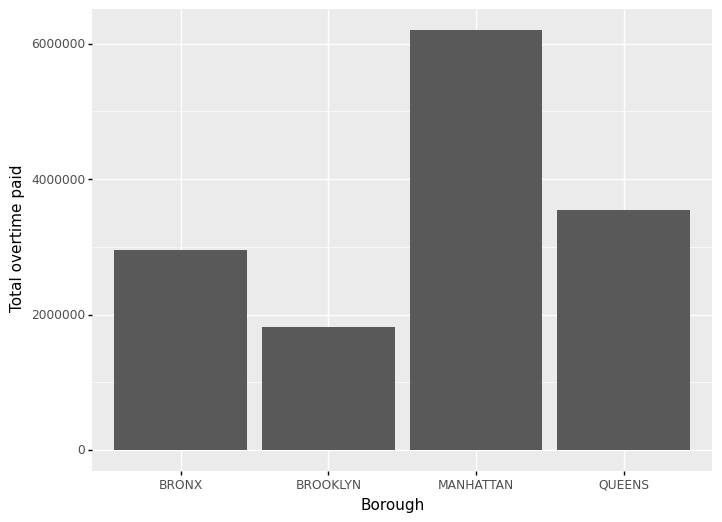

<ggplot: (771359309)>

In [27]:
chart = (
    ggplot(df.query('ot_hours > 0').query('ot_hours>regular_hours'), 
           aes(y='total_ot_paid', x='work_location_borough')) +
        geom_bar(stat='identity') +
        labs(
            y = 'Total overtime paid',
            x = 'Borough'
        ) + 
        theme(figure_size=(8,6))

)

chart

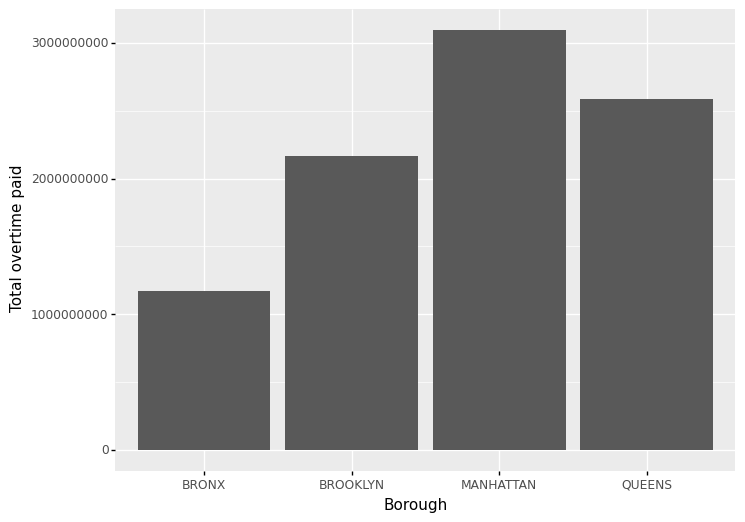

<ggplot: (771359312)>

In [28]:
chart = (
    ggplot(df, 
           aes(y='total_ot_paid', x='work_location_borough')) +
        geom_bar(stat='identity') +
        labs(
            y = 'Total overtime paid',
            x = 'Borough'
        ) + 
        theme(figure_size=(8,6))

)

chart

In [30]:
df.groupby(by='work_location_borough').count()

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,today,tenure_years
work_location_borough,,,,,,,,,,,,,,,,,,
BRONX,147439,114951,147439,147088,147083,87945,147376,147439,147439,147439,147439,147439,147439,147439,147439,147439,147439,147376
BROOKLYN,263071,207658,263071,262510,262510,160017,263071,263071,263071,263071,263071,263071,263071,263071,263071,263071,263071,263071
MANHATTAN,2030073,1642855,2030073,2025659,2025657,1178912,2029834,2030056,2030073,2030073,2030073,2030073,2030073,2030073,2030073,2030073,2030073,2029834
QUEENS,320099,253261,320099,319556,319539,189498,320099,320088,320099,320099,320099,320099,320099,320099,320099,320099,320099,320099


In [46]:
df_agencies.query('ot_hours > 1500')

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,today,tenure_years
92478,2017,NaN,DEPARTMENT OF CORRECTION,BOYD,TOUSSAINT,NaN,1997-07-10,QUEENS,CORRECTION OFFICER,ACTIVE,"82,808.00",per Annum,"2,085.72","84,295.91","1,560.32","104,026.51","11,690.19",2022-05-28 16:30:06.791017,24.00
92688,2017,NaN,DEPARTMENT OF CORRECTION,BROWN,LATANYA,D,2001-10-11,MANHATTAN,CAPTAIN,ACTIVE,"103,585.00",per Annum,"2,085.72","106,160.82","1,516.00","115,924.71","11,168.71",2022-05-28 16:30:06.791017,20.00
93179,2017,NaN,DEPARTMENT OF CORRECTION,CARILLO,ALFONSE,NaN,1993-03-29,QUEENS,OILER,ACTIVE,457.36,per Day,"2,085.72","123,362.34","1,885.00","160,738.76","31,502.29",2022-05-28 16:30:06.791017,29.00
93579,2017,NaN,DEPARTMENT OF CORRECTION,CHRISTOPHER,MITCHELL,R,1990-08-30,QUEENS,CAPTAIN,ACTIVE,"103,585.00",per Annum,"2,085.72","106,160.82","1,843.50","159,839.28","15,636.08",2022-05-28 16:30:06.791017,31.00
93588,2017,NaN,DEPARTMENT OF CORRECTION,CHUY,ANTONIO,NaN,1989-11-09,QUEENS,CORRECTION OFFICER,ACTIVE,"82,808.00",per Annum,"2,085.72","84,295.91","1,711.75","119,955.72","17,536.26",2022-05-28 16:30:06.791017,32.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427611,2021,72.00,DEPARTMENT OF CORRECTION,YOUNG,ANDRE,S,2018-01-08,QUEENS,CORRECTION OFFICER,ACTIVE,"56,318.00",per Annum,"2,080.00","56,199.20","1,571.80","33,508.58","4,187.73",2022-05-28 16:30:06.791017,4.00
2430962,2021,72.00,DEPARTMENT OF CORRECTION,DAWODU,RAHMAN,NaN,2018-01-08,QUEENS,CORRECTION OFFICER,ACTIVE,"56,318.00",per Annum,"2,080.00","56,203.27","1,520.20","32,272.30","4,071.27",2022-05-28 16:30:06.791017,4.00
2431690,2021,72.00,DEPARTMENT OF CORRECTION,WHITE,JAMELL,D,2018-07-23,QUEENS,CORRECTION OFFICER,ACTIVE,"56,318.00",per Annum,"2,080.00","53,982.30","1,641.97","33,807.73","4,414.14",2022-05-28 16:30:06.791017,3.00
2436693,2021,72.00,DEPARTMENT OF CORRECTION,JOSEPH,JOANNA,D,2019-02-11,QUEENS,CORRECTION OFFICER,ACTIVE,"52,216.00",per Annum,"2,080.00","51,701.71","1,737.00","33,779.31","4,562.43",2022-05-28 16:30:06.791017,3.00


In [47]:
df_agencies.query('ot_hours > 1500').query('leave_status_as_of_june_30 == "CEASED"')

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,today,tenure_years
1705627,2020,56.00,POLICE DEPARTMENT,MURTHA,KEVIN,NaN,1995-04-30,MANHATTAN,LIEUTENANT D/A SPECIAL ASSIGNMENT,CEASED,"141,196.00",per Annum,665.18,"48,008.86","2,451.57","162,000.47","78,132.88",2022-05-28 16:30:06.791017,27.00
1811769,2020,72.00,DEPARTMENT OF CORRECTION,HUGHES,CHARLES,D,1987-08-06,QUEENS,CORRECTION OFFICER,CEASED,"85,292.00",per Annum,"1,784.00","72,759.40","1,600.00","58,187.43","38,391.31",2022-05-28 16:30:06.791017,34.00
2293332,2021,57.00,FIRE DEPARTMENT,SENATORE,ROBERT,L,1995-10-15,BROOKLYN,PILOT,CEASED,"105,926.00",per Annum,"1,531.43","77,768.12","2,103.37","115,226.89","15,221.53",2022-05-28 16:30:06.791017,26.00
2299465,2021,57.00,FIRE DEPARTMENT,COLASANTE,ITALO,NaN,1998-05-17,BROOKLYN,FIREFIGHTER,CEASED,"85,292.00",per Annum,"2,080.00","85,051.84","1,559.32","68,609.39","22,886.31",2022-05-28 16:30:06.791017,24.00
2299982,2021,57.00,FIRE DEPARTMENT,BRANFORD,HASANI,P,2002-01-27,BROOKLYN,FIRE MARSHAL,CEASED,"95,527.00",per Annum,"1,851.43","84,789.60","1,686.03","72,063.05","17,927.99",2022-05-28 16:30:06.791017,20.00
2305260,2021,57.00,FIRE DEPARTMENT,SIMMONS,JOHN,J,2001-10-28,BROOKLYN,FIRE MARSHAL,CEASED,"95,527.00",per Annum,"1,188.60","54,431.18","1,683.00","76,079.23","29,798.06",2022-05-28 16:30:06.791017,20.00


In [19]:
df.ot_hours.sum()

169673976.02000007

In [52]:
df_agencies.query('agency_name == "DEPARTMENT OF CORRECTION"').query('tenure_years > 10').total_ot_paid.mean()

20941.047853974753

In [49]:
df_agencies.query('agency_name == "POLICE DEPARTMENT"').tenure_years.mean()

14.090425641201247

In [50]:
df_agencies.query('agency_name == "FIRE DEPARTMENT"').tenure_years.mean()

14.860181961136696

In [20]:
df.regular_hours.sum()

1840929865.5599997

In [38]:
df_agencies.groupby('agency_name').count()

,fiscal_year,payroll_number,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,today,tenure_years
agency_name,,,,,,,,,,,,,,,,,,
DEPARTMENT OF CORRECTION,67749,53457,67749,67749,33343,67749,67749,67749,67749,67749,67749,67749,67749,67749,67749,67749,67749,67749
FIRE DEPARTMENT,89030,71369,89030,89030,68237,89030,89030,89030,89030,89030,89030,89030,89030,89030,89030,89030,89030,89030
POLICE DEPARTMENT,292030,231416,287839,287839,200919,292030,292030,292030,292030,292030,292030,292030,292030,292030,292030,292030,292030,292030


In [21]:
df.query('ot_hours > regular_hours').query('ot_hours > 0')

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,today,tenure_years
3699,2017,NaN,ADMIN FOR CHILDREN'S SVCS,KNOX,HOWARD,NaN,2016-11-28,MANHATTAN,PAINTER,ACTIVE,41.79,per Hour,"1,035.03","40,328.74","1,044.50","57,722.59","1,755.18",2022-05-28 16:30:06.791017,5.00
4956,2017,NaN,ADMIN FOR CHILDREN'S SVCS,OPUOGEN,ANTHONY,O,1996-06-23,MANHATTAN,CHILD PROTECTIVE SPECIALIST,ACTIVE,"58,631.00",per Annum,"1,825.00","60,317.51","1,869.75","95,411.40","9,751.05",2022-05-28 16:30:06.791017,25.00
6752,2017,NaN,ADMIN FOR CHILDREN'S SVCS,UDDIN,MOHAMED,F,2003-10-27,MANHATTAN,MOTOR VEHICLE OPERATOR,ACTIVE,"46,476.00",per Annum,"2,085.72","47,816.99","2,459.75","92,255.31","6,848.40",2022-05-28 16:30:06.791017,18.00
6988,2017,NaN,ADMIN FOR CHILDREN'S SVCS,WATKINS,TYRONE,M,2001-11-05,MANHATTAN,CUSTODIAN,ACTIVE,"36,071.00",per Annum,"2,085.72","36,524.32","2,420.00","66,307.25","3,520.25",2022-05-28 16:30:06.791017,20.00
8392,2017,NaN,BOARD OF ELECTION,GARRETT,LOUISE,NaN,2011-09-11,BROOKLYN,TEMPORARY CLERK,CEASED,13.79,per Hour,556.50,"9,140.08",607.00,"12,456.17",0.00,2022-05-28 16:30:06.791017,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2861667,2021,841.00,DEPARTMENT OF TRANSPORTATION,MCCARTHY,DAVID,M,1988-08-29,QUEENS,AREA SUPERVISOR,CEASED,"114,869.00",per Annum,0.00,0.00,13.50,"1,123.57","-1,123.57",2022-05-28 16:30:06.791017,33.00
2861939,2021,56.00,POLICE DEPARTMENT,RIVERA JR,DAVID,NaN,2020-03-23,MANHATTAN,CITY CUSTODIAL ASSISTANT,CEASED,"32,260.00",per Annum,0.00,-23.13,2.50,20.86,0.00,2022-05-28 16:30:06.791017,2.00
2862081,2021,56.00,POLICE DEPARTMENT,GIBSON,JEREMIAH,E,2020-03-24,MANHATTAN,CITY CUSTODIAL ASSISTANT,CEASED,"32,260.00",per Annum,0.00,0.00,2.50,20.86,-30.90,2022-05-28 16:30:06.791017,2.00
2863746,2021,67.00,ADMIN FOR CHILDREN'S SVCS,EDOUARD,SAM,B,2019-09-23,BRONX,YOUTH DEVELOPMENT SPECIALIST,CEASED,"45,759.00",per Annum,-57.50,"-1,500.40",3.50,87.66,60.12,2022-05-28 16:30:06.791017,2.00


In [24]:
df_agencies.query('ot_hours > regular_hours').query('ot_hours > 0')

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,today,tenure_years
93697,2017,NaN,DEPARTMENT OF CORRECTION,COBBINAH,FELIX,NaN,2017-05-30,BRONX,MARINE ENGINEER,ACTIVE,36.19,per Hour,135.50,"2,587.94",176.50,"5,450.32",0.00,2022-05-28 16:30:06.791017,4.00
437032,2017,NaN,FIRE DEPARTMENT,BURKE,WILLIAM,O,1986-01-09,BROOKLYN,FIREFIGHTER,CEASED,"82,808.00",per Annum,0.00,"28,528.21",15.00,"5,510.90","2,609.71",2022-05-28 16:30:06.791017,36.00
442668,2017,NaN,FIRE DEPARTMENT,HOPKINS,MICHAEL,W,1994-02-28,BROOKLYN,FIREFIGHTER,CEASED,"82,808.00",per Annum,80.02,"24,791.08",114.00,"15,189.39","-8,330.92",2022-05-28 16:30:06.791017,28.00
452293,2017,NaN,FIRE DEPARTMENT,TUCKER,ROBERT,K,1994-10-23,BROOKLYN,FIREFIGHTER,CEASED,"82,808.00",per Annum,0.00,"22,229.02",9.00,"1,757.44","-1,129.45",2022-05-28 16:30:06.791017,27.00
525847,2017,NaN,POLICE DEPARTMENT,HUNTER-CLARK,TOBIA,M,1996-07-18,MANHATTAN,SERGEANTD/A SUPERVISOR DETECTIVE SQUAD,CEASED,"118,902.00",per Annum,102.87,"35,647.26",104.00,"11,448.78","4,849.41",2022-05-28 16:30:06.791017,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2776187,2021,57.00,FIRE DEPARTMENT,DEACETIS,LESLIE,NaN,2009-05-11,BROOKLYN,EMERGENCY MEDICAL SPECIALIST-PARAMEDIC,ON LEAVE,"55,302.00",per Annum,0.00,0.00,8.00,411.37,-10.22,2022-05-28 16:30:06.791017,13.00
2776734,2021,57.00,FIRE DEPARTMENT,MASSA,RICHARD,NaN,1994-07-17,BROOKLYN,FIREFIGHTER,CEASED,"85,292.00",per Annum,0.00,0.00,5.93,393.28,0.00,2022-05-28 16:30:06.791017,27.00
2860801,2021,57.00,FIRE DEPARTMENT,DAVIS,ASHANTI,L,2000-09-29,MANHATTAN,EMERGENCY MEDICAL SPECIALIST-EMT,CEASED,"48,153.00",per Annum,0.00,"1,385.86",14.00,474.30,"-1,860.16",2022-05-28 16:30:06.791017,21.00
2861939,2021,56.00,POLICE DEPARTMENT,RIVERA JR,DAVID,NaN,2020-03-23,MANHATTAN,CITY CUSTODIAL ASSISTANT,CEASED,"32,260.00",per Annum,0.00,-23.13,2.50,20.86,0.00,2022-05-28 16:30:06.791017,2.00


In [25]:
df.total_ot_paid.sum()

9014664754.070004

In [26]:
df.groupby(by='fiscal_year').total_ot_paid.sum()

fiscal_year
2017   1,866,990,981.37
2018   1,803,832,442.98
2019   1,781,905,103.35
2020   1,866,461,729.67
2021   1,695,474,496.70
Name: total_ot_paid, dtype: float64